# Getting started with INTEGRATE

This notebook contains a simple example of geeting started with INTEGRATE

In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    #%load_ext autoreload
    #%autoreload 2
    pass

In [2]:
import integrate as ig



In [3]:
case = 'DAUGAARD'

files = ig.get_case_data(case=case)
f_data_h5 = files[0]
f_data_h5 = 'DAUGAARD_AVG.h5'
file_gex= ig.get_gex_file_from_data(f_data_h5)

print("Using data file: %s" % f_data_h5)
print("Using GEX file: %s" % file_gex)

Using GEX file: ttem_example.gex


## 1. Setup the prior model ($\rho(\mathbf{m},\mathbf{d})$

In this example a simple layered prior model will be considered

### 1a. first, a sample of the prior model parameters, $\rho(\mathbf{m})$, will be generated

In [6]:
N=1000000
# Layered model
f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='chi2', NLAY_deg=3, RHO_min=1, RHO_max=3000)
# WorkBench type layered model
#f_prior_h5 = ig.prior_model_workbench(N=N,RHO_dist='chi2', nlayers=5)

# Plot some summary statistics of the prior model
ig.plot_prior_stats(f_prior_h5)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:04<00:00, 20564.20it/s]


Saving prior model to PRIOR_CHI2_NF_5_log-uniform_N100000.h5


### 1b. Then, a corresponding sample of $\rho(\mathbf{d})$, will be generated

In [7]:
f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex)

Creating a copy of PRIOR_CHI2_NF_5_log-uniform_N100000.h5 as PRIOR_CHI2_NF_5_log-uniform_N100000_ttem_example_Nh280_Nf12.h5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3125/3125 [08:11<00:00,  6.36it/s]


Concatenating D_chunks
D.shape (100000, 40)
Time elapsed: 493.0 s, for 100000 soundings. 4.930 ms/sounding. 202.8it/s


## Sample the posterior $\sigma(\mathbf{m})$

The posterior distribution is sampling using the extended rejection sampler.

In [9]:
N_use = N
f_post_h5 = ig.integrate_rejection(f_prior_data_h5, f_data_h5, N_use = N_use, parallel=1, updatePostStat=False, showInfo=1)

Running: integrate_rejection.py PRIOR_CHI2_NF_5_log-uniform_N100000_ttem_example_Nh280_Nf12.h5 tTEM_20230727_20230814_AVG_export_J1000.h5 --autoT 1 --N_use 5000000 --ns 400 -parallel 1 --updatePostStat 0
psm_5dd37d67
nsoundings:6001, N_use:100000, nd:40
Writing results to  POST_tTEM_20230727_20230814_AVG_export_J1000_PRIOR_CHI2_NF_5_log-uniform_N100000_ttem_example_Nh280_Nf12_Nu100000_aT1.h5
Using 32 parallel threads.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6001/6001 [04:07<00:00, 24.28it/s]


T_av=77.4, Time=247.4s/6001 soundings ,41.229ms/sounding
Writing to file:  POST_tTEM_20230727_20230814_AVG_export_J1000_PRIOR_CHI2_NF_5_log-uniform_N100000_ttem_example_Nh280_Nf12_Nu100000_aT1.h5


In [10]:
ig.integrate_posterior_stats(f_post_h5)

Creating /M1/Mean
Creating /M1/Median
Creating /M1/Std


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6001/6001 [00:07<00:00, 763.77it/s]


Creating /M2/Mean
Creating /M2/Median
Creating /M2/Std


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6001/6001 [00:00<00:00, 7622.20it/s]


### Plot some statistic from $\sigma(\mathbf{m})$

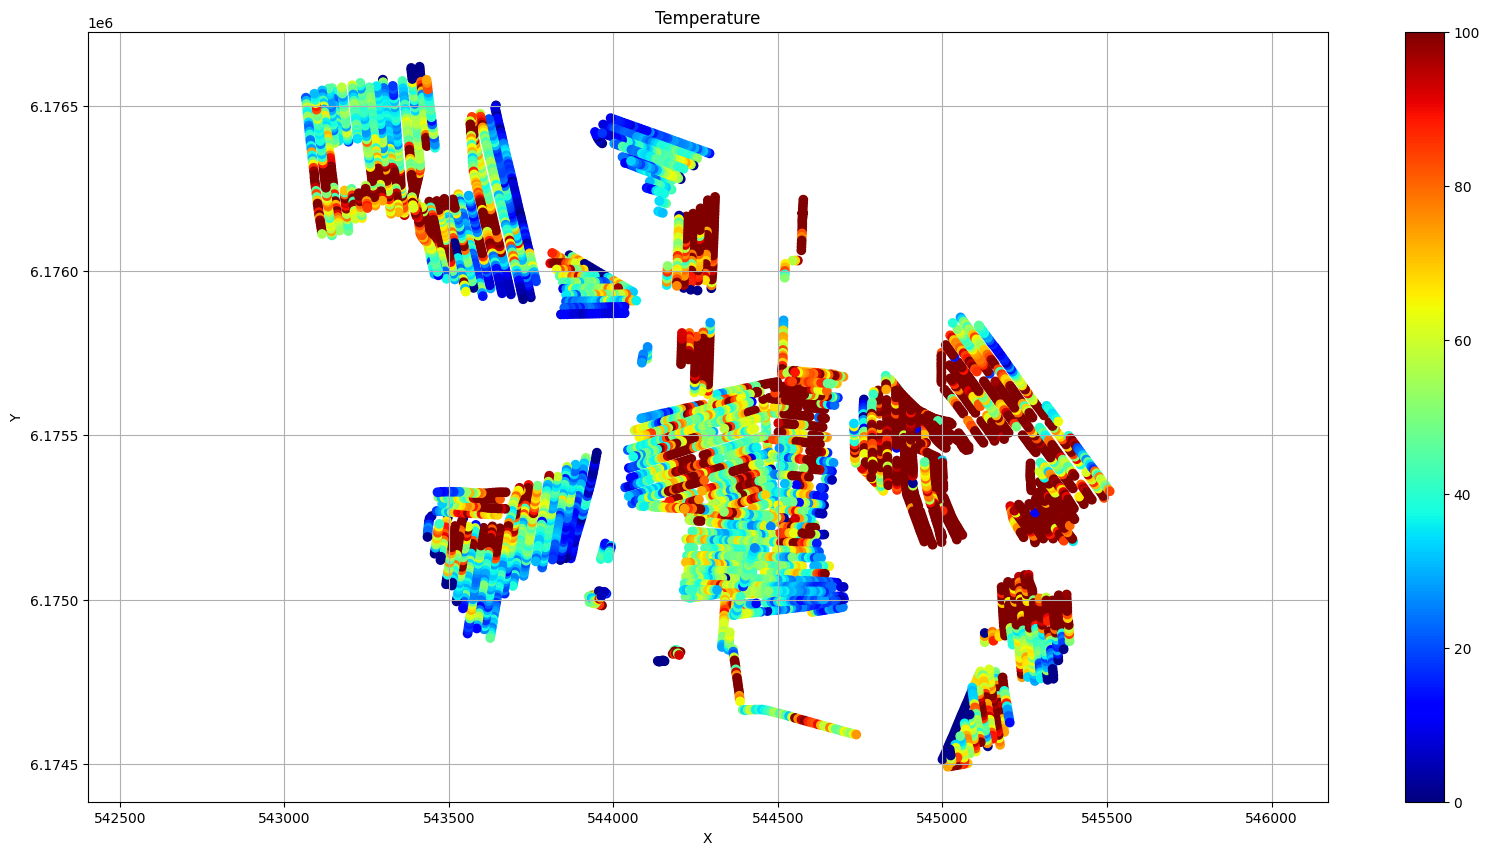

EV_min=-467.029433, EV_max=0.000000


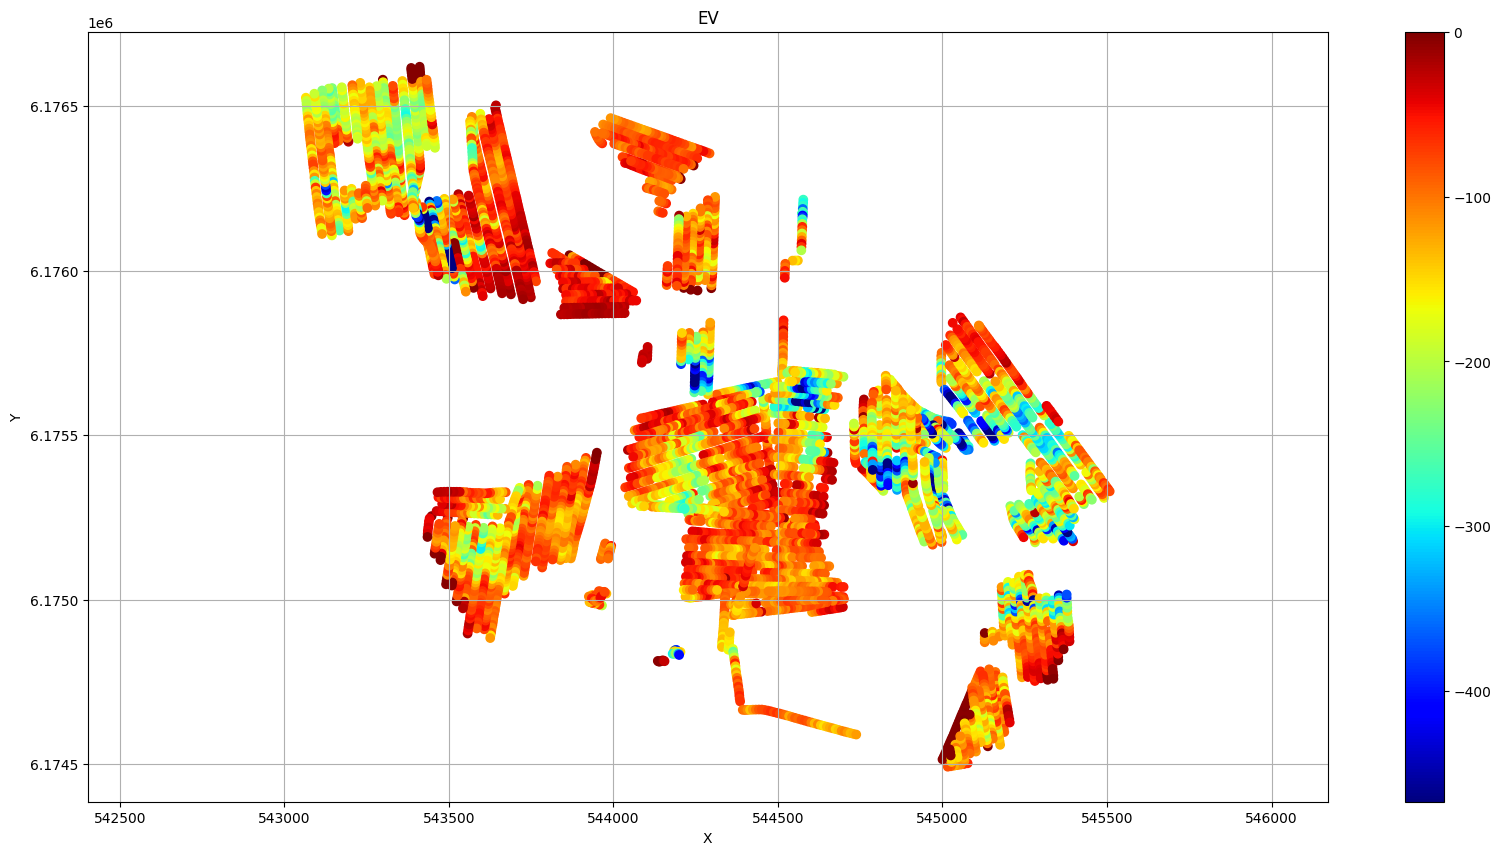

1

In [11]:
ig.plot_data_prior_post(f_post_h5, i_plot=100)
ig.plot_data_prior_post(f_post_h5, i_plot=0)

[10, 500]


/mnt/d/PROGRAMMING/integrate_module/integrate/integrate_plot.py:218: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(ID[:,i1:i2], ZZ[:,i1:i2], Mean[:,i1:i2],
/mnt/d/PROGRAMMING/integrate_module/integrate/integrate_plot.py:227: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(ID[:,i1:i2], ZZ[:,i1:i2], Median[:,i1:i2],
/mnt/d/PROGRAMMING/integrate_module/integrate/integrate_plot.py:236: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, pl

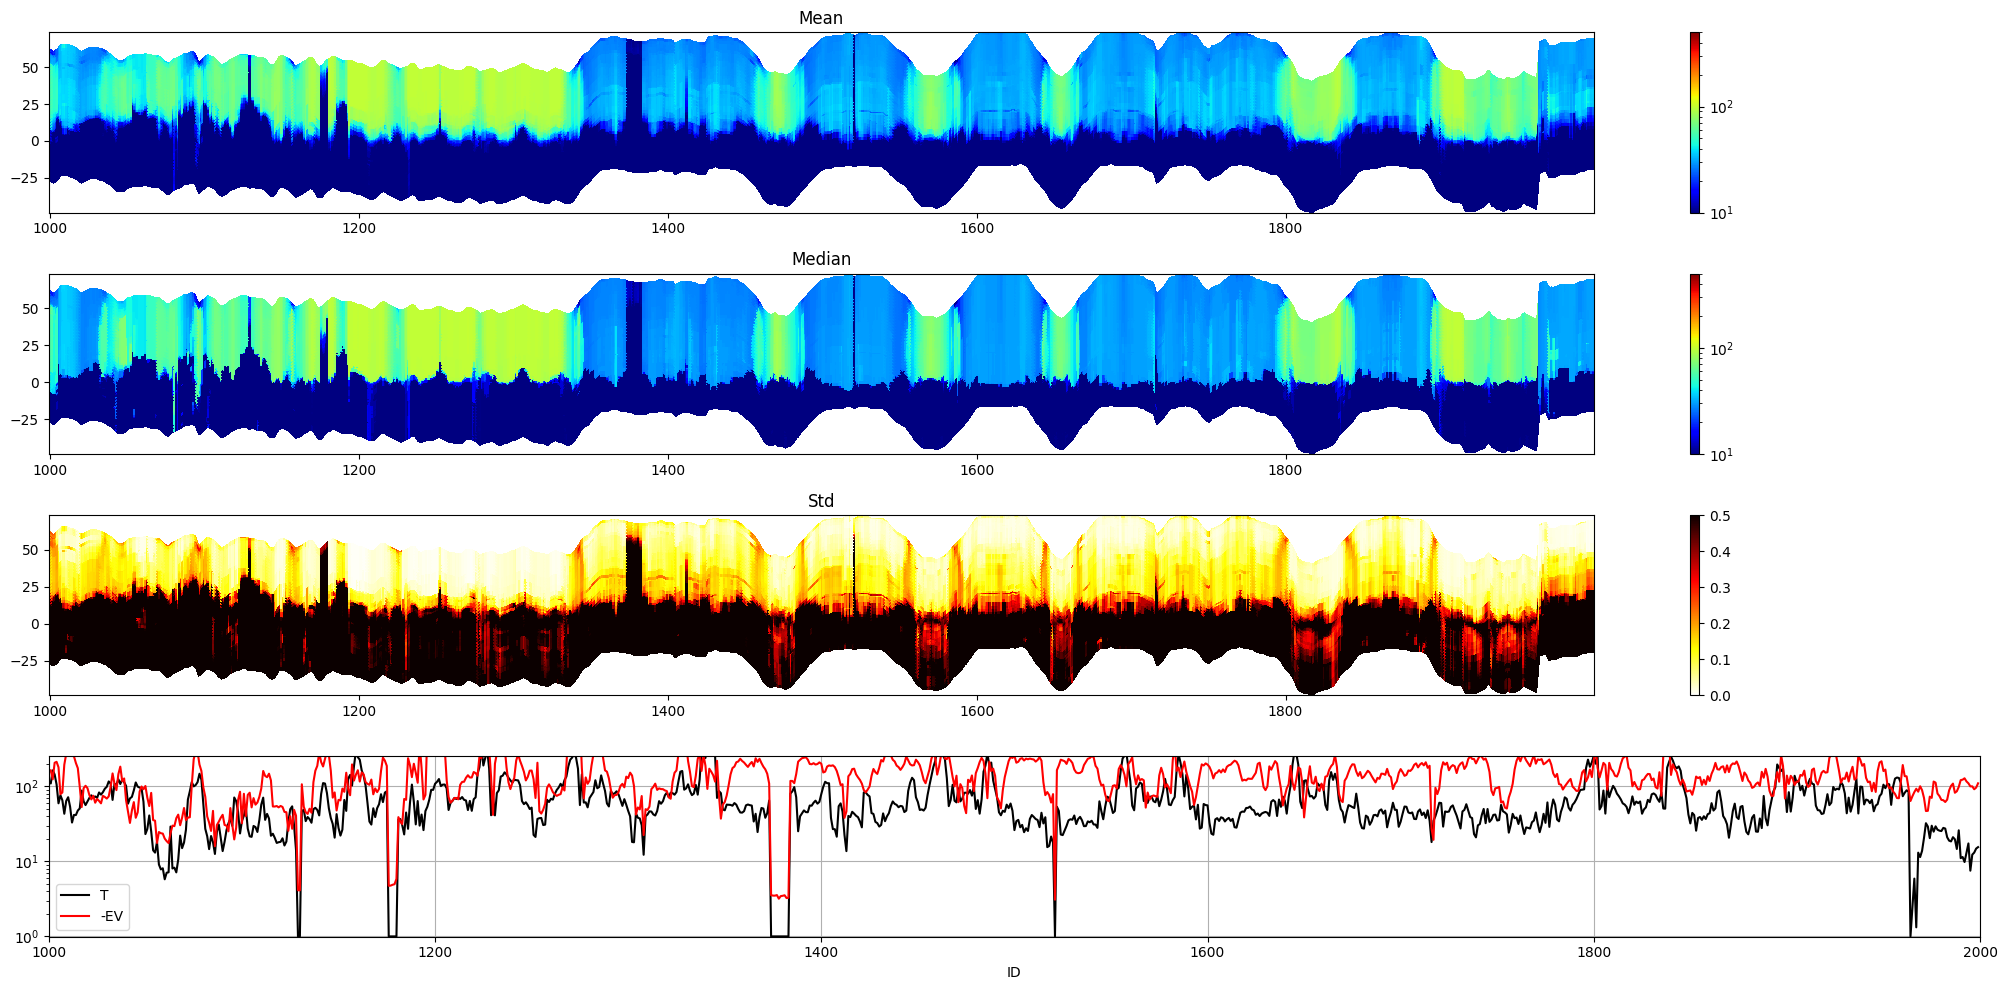

In [12]:
# Plot the Temperature used for inversion
ig.plot_T_EV(f_post_h5, pl='T')

Plotting Feature 0 from /M2/Median


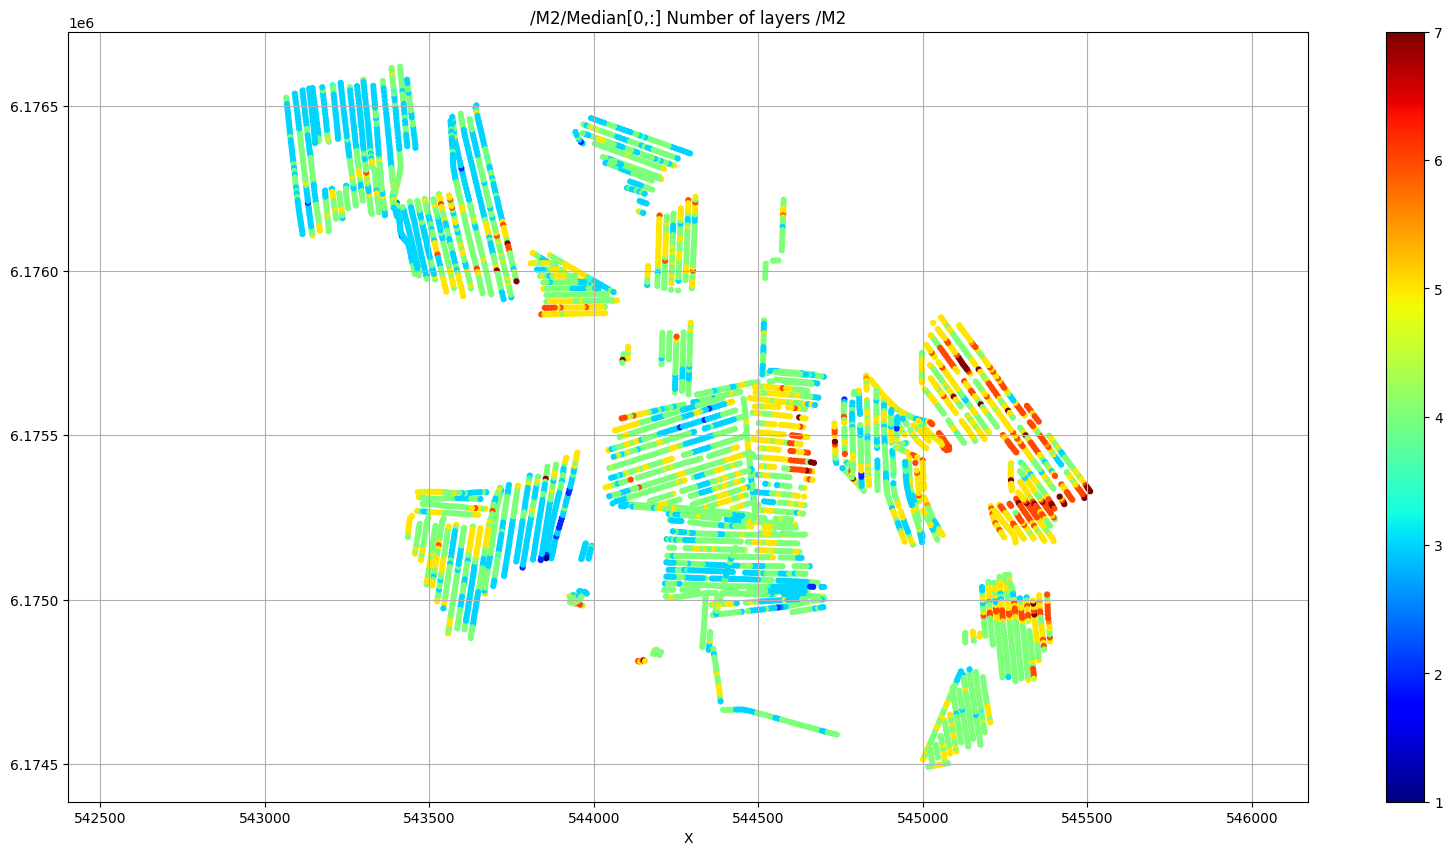

Plotting Feature 0 from /M1/Median


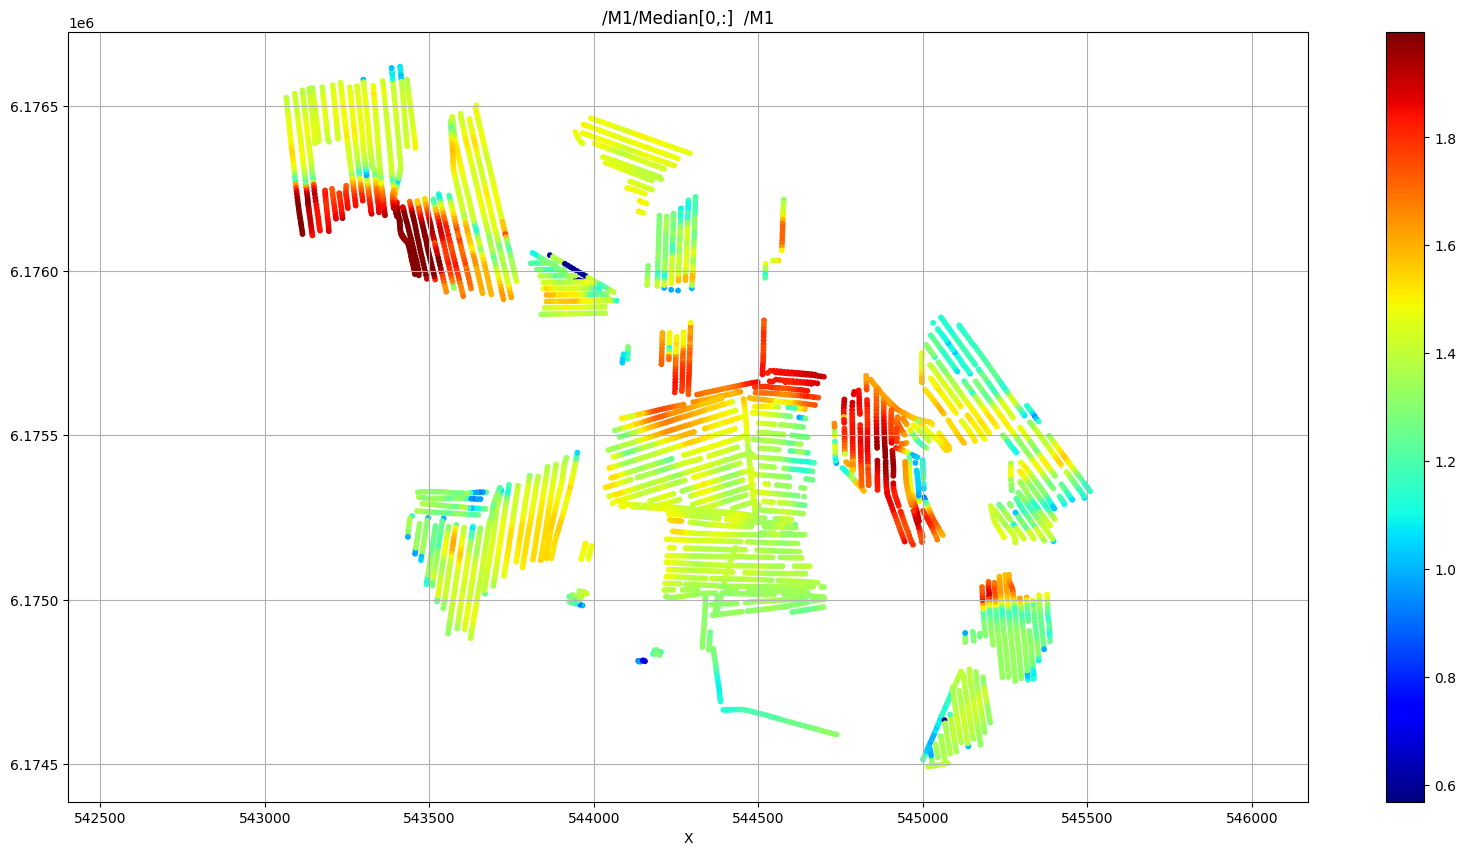

1

In [13]:
ig.plot_profile(f_post_h5, i1=1000, i2=2000, im=1)

In [ ]:

# Plot a 2D feature: Resistivity in layer 10
ig.plot_feature_2d(f_post_h5,im=1,iz=12, key='Median', uselog=1, cmap='jet', s=10)
#ig.plot_feature_2d(f_post_h5,im=1,iz=80,key='Median')

try:
    # Plot a 2D feature: The number of layers
    ig.plot_feature_2d(f_post_h5,im=2,iz=0,key='Median', title_text = 'Number of layers', uselog=0, clim=[1,6], cmap='jet', s=12)
except:
    pass